In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_excel('/content/drive/MyDrive/Datasets/financial_loan.xlsx')

In [ ]:
df.shape

(38576, 24)

In [ ]:
df.head(4)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911


In [ ]:
df.tail(5)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677
38575,682952,NY,INDIVIDUAL,4 years,Allen Edmonds,F,RENT,2021-07-11,2021-05-16,2021-05-16,...,F3,60 months,Verified,80000.0,0.0600,486.86,0.2099,18000,7,27679


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

In [ ]:
df.isnull().sum()

,0
id,0
address_state,0
application_type,0
emp_length,0
emp_title,1438
grade,0
home_ownership,0
issue_date,0
last_credit_pull_date,0
last_payment_date,0


In [ ]:
empty_row=df[df['emp_title'].isna()]
print(empty_row)

            id address_state application_type emp_length emp_title grade  \
19     1058060            MD       INDIVIDUAL  10+ years       NaN     D   
21      207910            FL       INDIVIDUAL   < 1 year       NaN     A   
31      744344            WA       INDIVIDUAL    6 years       NaN     B   
239     494363            NM       INDIVIDUAL     1 year       NaN     B   
245     781298            TX       INDIVIDUAL    9 years       NaN     B   
...        ...           ...              ...        ...       ...   ...   
38305   617250            CO       INDIVIDUAL    5 years       NaN     B   
38311   543406            NY       INDIVIDUAL     1 year       NaN     B   
38314   375077            NY       INDIVIDUAL    3 years       NaN     B   
38326   781758            CA       INDIVIDUAL    5 years       NaN     C   
38362   664374            GA       INDIVIDUAL    4 years       NaN     B   

      home_ownership issue_date last_credit_pull_date last_payment_date  ...  \
19     

In [ ]:
df["emp_title"] = df["emp_title"].fillna("unidentified")

In [ ]:
df.head(20)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
5,1062608,CA,INDIVIDUAL,3 years,Studio 94 Corp,C,RENT,2021-07-17,2021-03-16,2021-08-12,...,C3,36 months,Not Verified,28000.0,0.1260,275.96,0.1465,8000,11,8637
6,1067441,TX,INDIVIDUAL,10+ years,American Airlines,C,MORTGAGE,2021-11-19,2021-06-14,2021-12-13,...,C2,36 months,Verified,94800.0,0.2453,205.86,0.1427,6000,30,7218
7,1066424,PA,INDIVIDUAL,10+ years,SCI Mahanoy,A,OWN,2021-06-11,2021-07-14,2021-07-14,...,A4,36 months,Source Verified,59000.0,0.0665,172.10,0.0790,5500,23,6172
8,1065254,FL,INDIVIDUAL,10+ years,Tech Data Corp,A,MORTGAGE,2021-09-02,2021-06-15,2021-10-12,...,A5,36 months,Verified,116400.0,0.0394,762.08,0.0890,24000,31,8650
9,1064589,MI,INDIVIDUAL,10+ years,teltow contracting,B,MORTGAGE,2021-02-09,2021-03-16,2021-03-16,...,B5,60 months,Not Verified,36000.0,0.1773,93.21,0.1269,4125,21,5551


In [ ]:
df.isnull().sum()

,0
id,0
address_state,0
application_type,0
emp_length,0
emp_title,0
grade,0
home_ownership,0
issue_date,0
last_credit_pull_date,0
last_payment_date,0


In [ ]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


In [ ]:
df['annual_income'].dtype

dtype('float64')

#Range of annlual income

In [ ]:
min_income=df['annual_income'].min()
max_income=df['annual_income'].max()
print(f"Annual income range: {min_income} - {max_income}")

Annual income range: 4000.0 - 6000000.0


#Mean,Median,Mode,standard_devation and variance of Annual_Income


In [ ]:
mean_income=df['annual_income'].mean()
print(f"Annual Income mean: {mean_income}")

Annual Income mean: 69644.54031003732


In [ ]:
median_income=df['annual_income'].median()
print(f"Annual Income Median: {median_income}")

Annual Income Median: 60000.0


In [ ]:
mode_income=df['annual_income'].mode()
print(f"Annual Income Mode: {mode_income}")

Annual Income Mode: 0    60000.0
Name: annual_income, dtype: float64


In [ ]:
std_income=df['annual_income'].std()
print(f"Annual Income Standard Deviation: {std_income}")

Annual Income Standard Deviation: 64293.68104452454


In [ ]:
var_income=df['annual_income'].var()
print(f"Annual Income Variance: {var_income}")

Annual Income Variance: 4133677422.255055


#Maximum and Minimum values of Loan

In [ ]:
max_loan=df['loan_amount'].max()
print(f"Maximum Loan Amount: {max_loan}")

min_loan=df['loan_amount'].min()
print(f"Minimum Loan Amount: {min_loan}")

Maximum Loan Amount: 35000
Minimum Loan Amount: 500


#Range,mean,mode,median,variance and standard devation of Loan Amount

In [ ]:
mean_loan=df['loan_amount'].mean()
print(f"Loan Amount mean: {mean_loan}")

median_loan=df['loan_amount'].median()
print(f"Loan Amount Median: {median_loan}")

mode_loan=df['loan_amount'].mode()
print(f"Loan Amount Mode: {mode_loan}")

std_loan=df['loan_amount'].std()
print(f"Loan Amount Standard Deviation: {std_loan}")

var_loan=df['loan_amount'].var()
print(f"Loan Amount Variance: {var_loan}")

Loan Amount mean: 11296.066855039402
Loan Amount Median: 10000.0
Loan Amount Mode: 0    10000
Name: loan_amount, dtype: int64
Loan Amount Standard Deviation: 7460.746022249619
Loan Amount Variance: 55662731.20851351


#annual Income Histogram

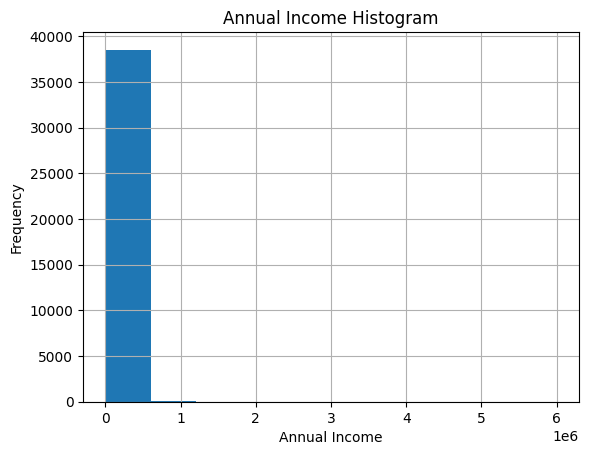

In [ ]:
df['annual_income'].hist()
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Annual Income Histogram')
plt.show()

In [ ]:
df.dtypes

,0
id,int64
address_state,object
application_type,object
emp_length,object
emp_title,object
grade,object
home_ownership,object
issue_date,datetime64[ns]
last_credit_pull_date,datetime64[ns]
last_payment_date,datetime64[ns]


##Total Loan Applicants

In [ ]:
total_loan_applicants=df['id'].count()
print(f"Total Loan Applicants: {total_loan_applicants}")

Total Loan Applicants: 38576


##MTD Loan Applicants

In [ ]:
latest_issue_date=df['issue_date'].max()
latest_year=latest_issue_date.year
latest_month=latest_issue_date.month
mtd_loan_applicants=df[(df['issue_date'].dt.year==latest_year) & (df['issue_date'].dt.month==latest_month)]
mtd_loan_applicants_count=mtd_loan_applicants['id'].count()
print(f"MTD Loan Applicants: {mtd_loan_applicants_count}")

MTD Loan Applicants: 4314


##Total Funded Amount

In [ ]:
total_fund=df['loan_amount'].sum()
total_fund_in_mill=total_fund/1000000
print("Total Funded Amount: ${:.2f}M".format(total_fund_in_mill))

Total Funded Amount: $435.76M


#MTD_TOTAL FUNDED

In [ ]:
latest_issue_date=df['issue_date'].max()
latest_year=latest_issue_date.year
latest_month=latest_issue_date.month
mtd_loan_applicants=df[(df['issue_date'].dt.year==latest_year) & (df['issue_date'].dt.month==latest_month)]
mtd_loan_funds=mtd_loan_applicants['loan_amount'].sum()
mtd_loan_funds_in_mill=mtd_loan_funds/1000000
print("MTD Funded Amount: ${:.2f}M".format(mtd_loan_funds_in_mill))

MTD Funded Amount: $53.98M


##Total Amount Recieved

In [ ]:
total_amount_recieved=df['total_payment'].sum()
total_amount_recieved_in_mill=total_funded_amount/1000000
print("Total Funded Amount: ${:.2f}M".format(total_amount_recieved_in_mill))

Total Funded Amount: $473.07M


##MTD Total Amount Recieved

In [ ]:
latest_issue_date=df['issue_date'].max()
latest_year=latest_issue_date.year
latest_month=latest_issue_date.month
mtd_data=df[(df['issue_date'].dt.year==latest_year) & (df['issue_date'].dt.month==latest_month)]
mtd_total_amount_recieved=mtd_data['total_payment'].sum()
mtd_total_amount_recieved_in_mill=mtd_total_amount_recieved/1000000
print("Total Amount : ${:.2f}M".format(total_amount_recieved_in_mill))

Total Amount : $473.07M


##Average Interst

In [ ]:
avg_int_rate=df['int_rate'].mean()*100
print("Avg Interest Rate: ${:.2f}M".format(avg_int_rate))

Avg Interest Rate: $12.05M


###Average Debt-To-Income

In [ ]:
avg_debt_to_income=df['dti'].mean()*100
print("Avg Debt to Income: ${:.2f}M".format(avg_debt_to_income))

Avg Debt to Income: $13.33M


##Good Loan Metrics

In [ ]:
good_loans=df[df['loan_status'].isin(["Fully Paid","Current"])]
total_loan_applications=df['id'].count()

good_loan_application=good_loans['id'].count()
good_loan_funded=good_loans['loan_amount'].count()
good_loans_recieved=good_loans['total_payment'].sum()

good_loan_funded_in_mill=good_loan_funded/1000000
good_loans_recieved_in_mill=good_loans_recieved/1000000

good_loan_percentage=(good_loan_application/total_loan_applications)*100


print("Good Loan Application",good_loan_application)
print("Good Loan recieved in Million: {:.2f}%".format(good_loans_recieved_in_mill))
print("Good Loan Funded in Million: {:.2f}%".format(good_loan_funded_in_mill))
print("Percentage of Good Loan: {:.2f}%".format(good_loan_percentage))

Good Loan Application 33243
Good Loan recieved in Million: 435.79%
Good Loan Funded in Million: 0.03%
Percentage of Good Loan: 86.18%


##Bad Loan Metrics

In [ ]:
bad_loans=df[df['loan_status'].isin(['Charged off'])]
total_loan_applications=df['id'].count()

bad_loan_application=bad_loans['id'].count()
bad_loan_funded=bad_loans['loan_amount'].count()
bad_loans_recieved=bad_loans['total_payment'].sum()

bad_loan_funded_in_mill=bad_loan_funded/1000000
bad_loans_recieved_in_mill=bad_loans_recieved/1000000

bad_loan_percentage=(bad_loan_application/total_loan_applications)*100

print("Bad Loan Application",bad_loan_application)
print("Bad Loan recieved in Million: {:.2f}%".format(bad_loans_recieved_in_mill))
print("Bad Loan Funded in Million: {:.2f}%".format(bad_loan_funded_in_mill))
print("Percentage of Bad Loan: {:.2f}%".format(bad_loan_percentage))

Bad Loan Application 0
Bad Loan recieved in Million: 0.00%
Bad Loan Funded in Million: 0.00%
Percentage of Bad Loan: 0.00%


##Monthly Trends by issue date for total funded amount

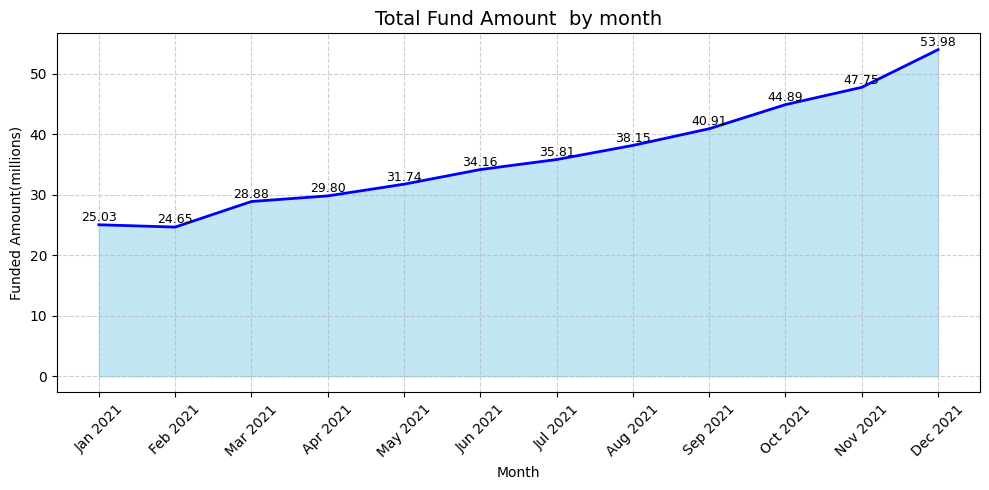

In [6]:
monthly_funded=(
    df.sort_values('issue_date')
    .assign(month_name=lambda x:x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name',sort=False)['loan_amount'].sum()
    .div(1_000_000)
    .reset_index(name='loan_amount_millions')
)
plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'],monthly_funded['loan_amount_millions'],color='skyblue',alpha=0.5)
plt.plot(monthly_funded['month_name'],monthly_funded['loan_amount_millions'],color='blue',linewidth=2)

for i,row in monthly_funded.iterrows():
  plt.text(i,row['loan_amount_millions']+0.1,f"{row['loan_amount_millions']:.2f}",
           ha='center',va='bottom',fontsize=9,rotation=0,color='black')
plt.title('Total Fund Amount  by month',fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount(millions)')
plt.xticks(ticks=range(len(monthly_funded)),labels=monthly_funded['month_name'],rotation=45)
plt.grid(True,linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

##Monthly Trends by issue date for total amount recieved

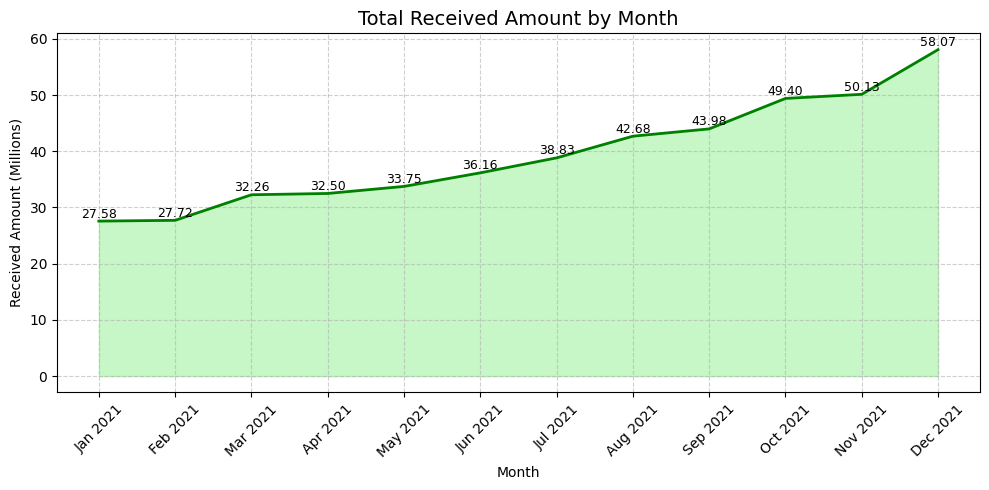

In [8]:
monthly_recieved = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['total_payment']
    .sum()
    .div(1000000)
    .reset_index(name='recieved_amount_millions')
)

# Plot
plt.figure(figsize=(10, 5))
plt.fill_between(
    monthly_recieved['month_name'],
    monthly_recieved['recieved_amount_millions'],
    color='lightgreen',
    alpha=0.5
)
plt.plot(
    monthly_recieved['month_name'],
    monthly_recieved['recieved_amount_millions'],
    color='green',
    linewidth=2
)

# Add labels above points
for i, row in monthly_recieved.iterrows():
    plt.text(
        i,
        row['recieved_amount_millions'] + 0.1,
        f"{row['recieved_amount_millions']:.2f}",
        ha='center',
        va='bottom',
        fontsize=9,
        rotation=0,
        color='black'
    )

plt.title('Total Received Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Received Amount (Millions)')
plt.xticks(
    ticks=range(len(monthly_recieved)),
    labels=monthly_recieved['month_name'],
    rotation=45
)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


###Monthly Trends by Issue Date for Total Loan Applications

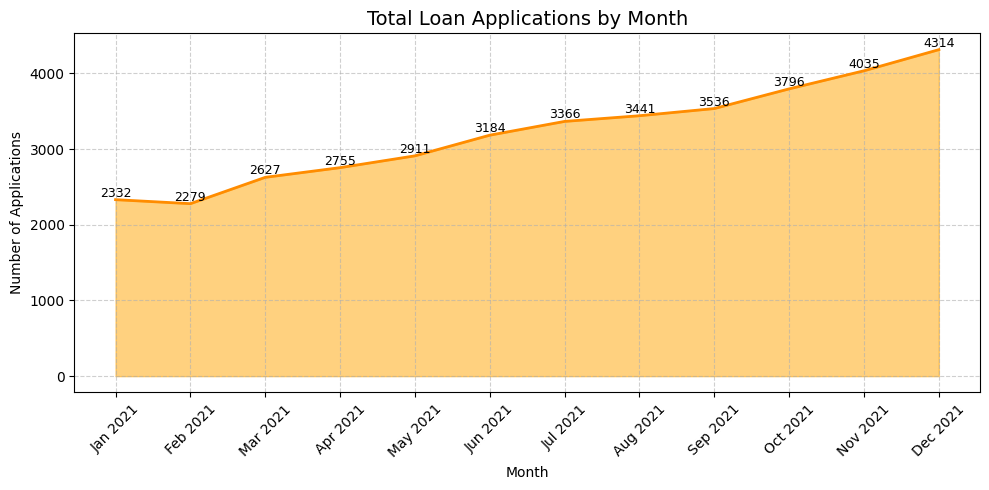

In [10]:
# Create the monthly applications DataFrame
monthly_applications = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['id']
    .count()
    .reset_index(name='loan_application_count')
)

# Plot
plt.figure(figsize=(10, 5))
plt.fill_between(
    monthly_applications['month_name'],
    monthly_applications['loan_application_count'],
    color='orange',
    alpha=0.5
)
plt.plot(
    monthly_applications['month_name'],
    monthly_applications['loan_application_count'],
    color='darkorange',
    linewidth=2
)

# Add labels above each point
for i, row in monthly_applications.iterrows():
    plt.text(
        i,
        row['loan_application_count'] + 0.5,
        f"{row['loan_application_count']}",
        ha='center',
        va='bottom',
        fontsize=9,
        rotation=0,
        color='black'
    )

plt.title('Total Loan Applications by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.xticks(
    ticks=range(len(monthly_applications)),
    labels=monthly_applications['month_name'],
    rotation=45
)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##Regional Analysis

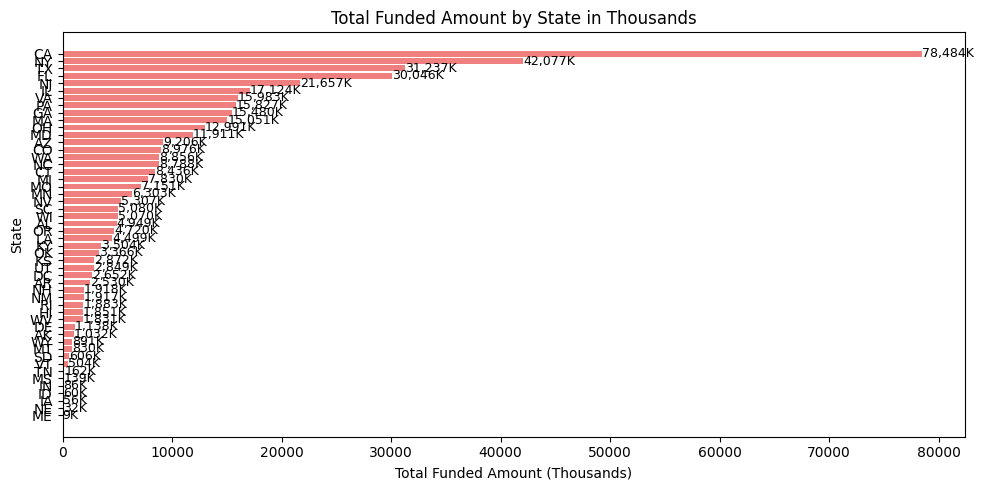

In [12]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousands = state_funding / 1000

plt.figure(figsize=(10, 5))
bars = plt.barh(
    state_funding_thousands.index,
    state_funding_thousands.values,
    color='lightcoral'
)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 10,  # Slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Vertically centered
        f"{width:,.0f}K",  # Format with commas and no decimals
        va='center',
        fontsize=9
    )

plt.title('Total Funded Amount by State in Thousands')
plt.xlabel('Total Funded Amount (Thousands)')
plt.ylabel('State')
plt.tight_layout()
plt.show()


##Loan Term analysis by Total Fund

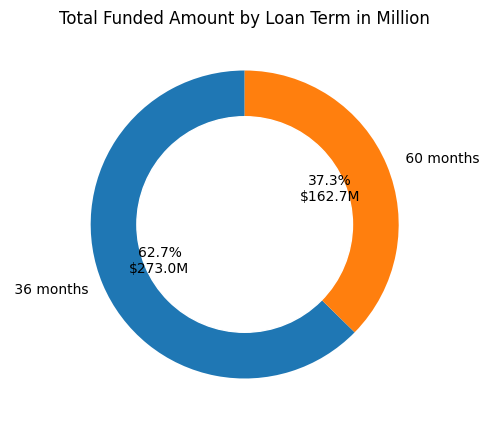

In [13]:
term_funding_millions=df.groupby('term')['loan_amount'].sum()/1000000
plt.figure(figsize=(5,5))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p:f"{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M",
    startangle=90,
    wedgeprops={'width':0.4}
)

plt.gca().add_artist(plt.Circle((0,0),0.70,color='white'))
plt.title('Total Funded Amount by Loan Term in Million')
plt.show()